### import libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df=pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<Axes: title={'center': 'Breast Cancer Dataset Class Distribution'}, xlabel='target'>

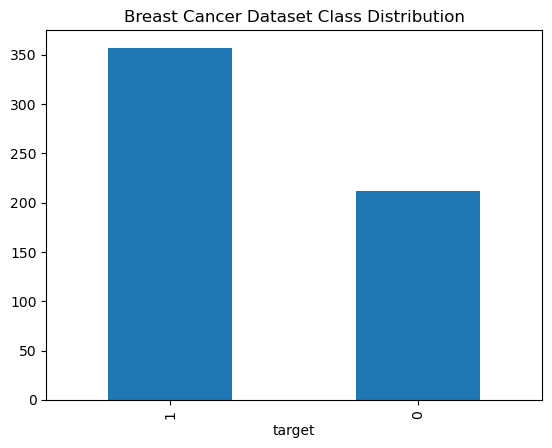

In [3]:
df['target'].value_counts().plot(kind='bar', title='Breast Cancer Dataset Class Distribution')

In [4]:
x=df.drop(columns='target')
y=df['target']

In [5]:
# testing and training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")
print(f"Train target shape: {y_train.shape}, Test target shape: {y_test.shape}")


Train shape: (455, 30), Test shape: (114, 30)
Train target shape: (455,), Test target shape: (114,)


In [6]:
# standardize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train_scaled[:5]

array([[0.15802925, 0.22455191, 0.14871122, 0.07701125, 0.38727339,
        0.09373658, 0.02371134, 0.02731113, 0.41666667, 0.25379107,
        0.03581387, 0.13410537, 0.0282241 , 0.01188902, 0.18264949,
        0.03751465, 0.02555556, 0.10409168, 0.10860021, 0.05911861,
        0.13174603, 0.25986141, 0.11576947, 0.06150671, 0.38939075,
        0.05930863, 0.03501597, 0.08182131, 0.21998817, 0.1242949 ],
       [0.62468645, 0.33243152, 0.62200263, 0.46975165, 0.61795839,
        0.39727624, 0.4997657 , 0.62574553, 0.33535354, 0.22262005,
        0.11645845, 0.14161952, 0.10606418, 0.0880651 , 0.25067138,
        0.18699492, 0.14005051, 0.36181095, 0.2339731 , 0.10745132,
        0.55952381, 0.3478145 , 0.53435072, 0.39848466, 0.64749032,
        0.25895742, 0.42396166, 0.7467354 , 0.289178  , 0.1686344 ],
       [0.17412088, 0.18397024, 0.16377583, 0.08749735, 0.3091617 ,
        0.07251089, 0.        , 0.        , 0.43838384, 0.20619208,
        0.07944957, 0.34582744, 0.06587193, 0.

In [7]:
from sklearn.svm import SVC
model=SVC(probability=True)
model.fit(x_train_scaled, y_train)

SVC(probability=True)

In [ ]:
y_pred=model.predict(x_test_scaled)
y_pred_proba=model.predict_proba(x_test_scaled)[:,1]



In [9]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")



Accuracy: 0.9825
Precision: 0.9861
Recall: 0.9861
F1 Score: 0.9861
ROC AUC: 0.9957


In [10]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'linear': {'kernel': ['linear'],'C': [0.1, 1, 10, 100]},
    'poly': {'kernel': ['poly'],'C': [0.1, 1, 10, 100],'degree': [2, 3, 4]},
    'sigmoid': {'kernel': ['sigmoid'],'C': [0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1]},
    'rbf': {'kernel': ['rbf'],'C': [0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1]},
}

best_model={}
for name,grid in param_grid.items():
    svc=SVC(probability=True)
    grid_search=GridSearchCV(svc,grid,cv=5,scoring='roc_auc',)
    grid_search.fit(x_train_scaled,y_train)
    best_model[name]=grid_search.best_estimator_
    print(f'{name.title()} Best Parameters: {grid_search.best_params_}')

Linear Best Parameters: {'C': 10, 'kernel': 'linear'}
Poly Best Parameters: {'C': 1, 'degree': 2, 'kernel': 'poly'}
Sigmoid Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'sigmoid'}
Rbf Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [11]:
metric={}
for name,model in best_model.items():
    y_pred=model.predict(x_test_scaled)
    y_pred_proba=model.predict_proba(x_test_scaled)[:,1]
    metric[name]={
        'accuracy': accuracy_score(y_test,y_pred),
        'precision': precision_score(y_test,y_pred),
        'recall': recall_score(y_test,y_pred),
        'f1': f1_score(y_test,y_pred),
        'roc_auc': roc_auc_score(y_test,y_pred_proba)
    }

df_metric=pd.DataFrame(metric)

df_metric=df_metric.T
df_metric

,accuracy,precision,recall,f1,roc_auc
linear,0.973684,0.985915,0.972222,0.979021,0.994378
poly,0.982456,0.986111,0.986111,0.986111,0.995370
sigmoid,0.973684,0.972603,0.986111,0.979310,0.995701
rbf,0.973684,0.985915,0.972222,0.979021,0.996362


<Axes: title={'center': 'SVC Classifier Performance Comparison'}>

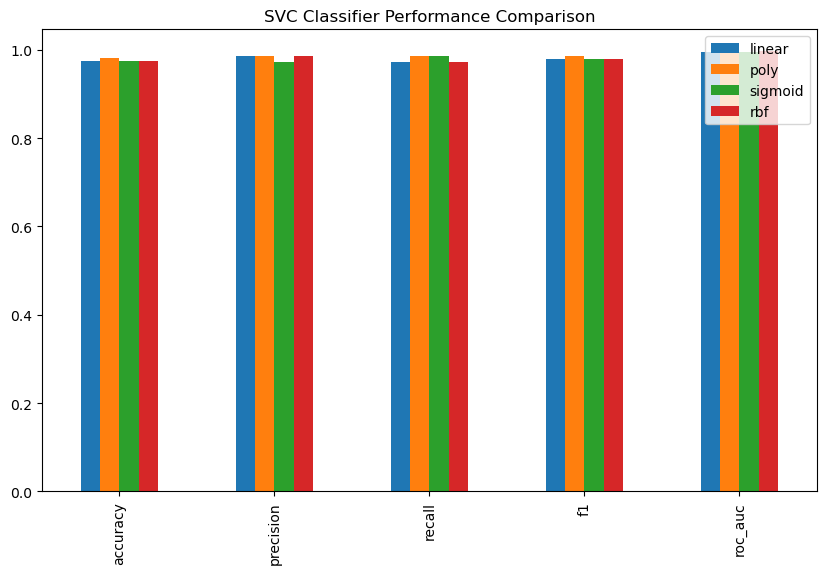

In [12]:
df_metric.T.plot(kind='bar', title='SVC Classifier Performance Comparison', figsize=(10, 6))

In [13]:
features=['mean radius','mean texture']
x2_train=x_train[features]
x_train_scaled=scaler.fit_transform(x2_train)


linear=best_model['linear']
rbf=best_model['rbf']
linear.fit(x_train_scaled,y_train)

SVC(C=10, kernel='linear', probability=True)

In [14]:

rbf.fit(x_train_scaled,y_train)

SVC(C=10, gamma=1, probability=True)

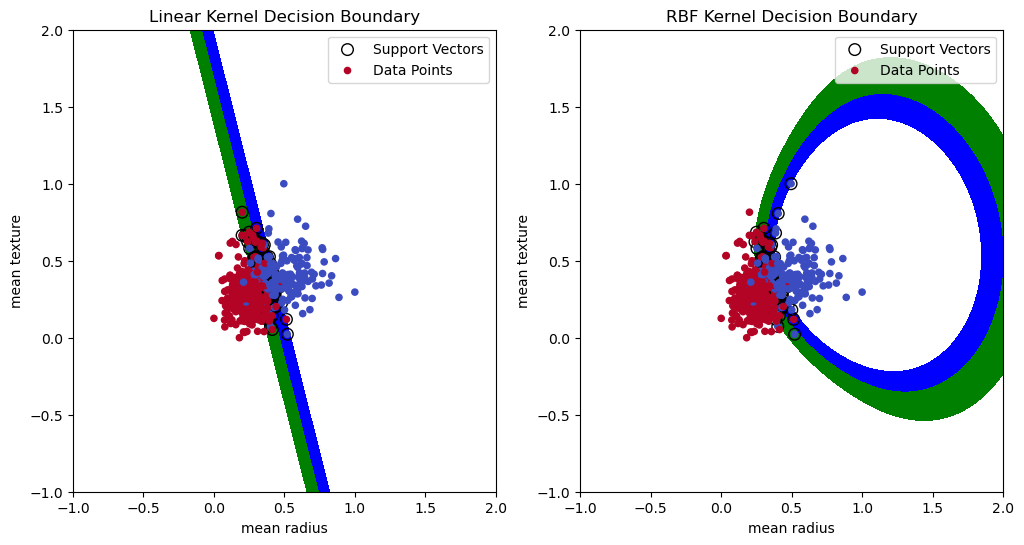

In [15]:
def plot_decision_boundry(model,x,y,ax,title):
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx,yy=np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))
    Z=model.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx,yy,Z,levels=[-1,0,1],linestyles=['--','-','--'],colors=['blue','green'])
    ax.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        facecolors='none',
        edgecolors='k',
        s=70,
        label='Support Vectors'
    )

    ax.scatter(x[:,0],x[:,1],c=y,s=20,cmap='coolwarm',label='Data Points')
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_title(title)
    ax.legend()


import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
plot_decision_boundry(linear,x_train_scaled,y_train,ax1,'Linear Kernel Decision Boundary')
plot_decision_boundry(rbf,x_train_scaled,y_train,ax2,'RBF Kernel Decision Boundary')
plt.show()
